Enter preferred x-coordinate: 4
Enter preferred y-coordinate: 3


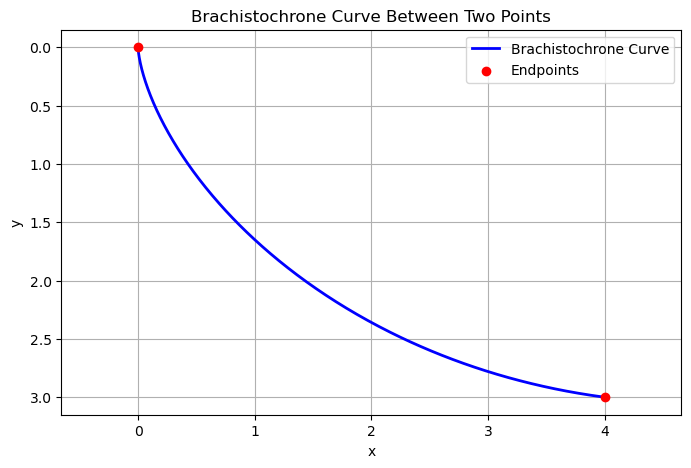

Theta_max = 2.8800, Scaling factor R = 1.5260


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Final point coordinates
x_f = int(input("Enter preferred x-coordinate:"))   # final x-coordinate
y_f = int(input("Enter preferred y-coordinate:"))    # final y-coordinate (vertical drop)

# Function to solve for theta_max
def equations(theta_max):
    # Cycloid scaling factor R in terms of theta_max
    R = y_f / (1 - np.cos(theta_max))
    # x-coordinate at theta_max should match x_f
    return R * (theta_max - np.sin(theta_max)) - x_f

# Solve for theta_max numerically
theta_max_guess = np.pi / 2  # initial guess
theta_max_solution = fsolve(equations, theta_max_guess)[0]

# Calculate scaling factor R
R = y_f / (1 - np.cos(theta_max_solution))

# Generate theta values
theta = np.linspace(0, theta_max_solution, 500)

# Cycloid (brachistochrone) coordinates
x = R * (theta - np.sin(theta))
y = R * (1 - np.cos(theta))

# Plot the brachistochrone curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Brachistochrone Curve', color='blue', lw=2)
plt.scatter([0, x_f], [0, y_f], color='red', zorder=5, label='Endpoints')
plt.title("Brachistochrone Curve Between Two Points")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()  # y downward
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Print out theta_max and R
print(f"Theta_max = {theta_max_solution:.4f}, Scaling factor R = {R:.4f}")


Enter final x-coordinate xf:  4
Enter final y-coordinate yf:  3
Enter alpha:  0.5


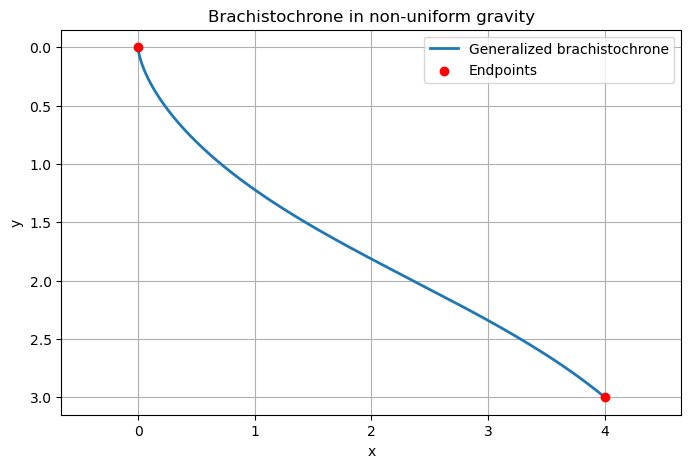


Solution found:
C = 0.887916


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import brentq
import sys

# ---------- USER INPUT ----------
x_f = float(input("Enter final x-coordinate xf: "))
y_f = float(input("Enter final y-coordinate yf: "))
alpha = float(input("Enter alpha: "))
# --------------------------------

# ---------- PHYSICAL CHECK ----------
if alpha <= 0:
    print("Wrong: alpha must be positive")
    sys.exit()

if y_f >= 2 / alpha:
    print("Wrong: physical condition violated (yf must be < 2/alpha)")
    sys.exit()

# ---------- NUMERICAL SETUP ----------
y_min = 1e-6
N = 6000
y_grid = np.linspace(y_min, y_f, N)

# Function that returns xf(C) - xf_target
def x_difference(C):
    denom = 1 / (C**2 * (y_grid - 0.5 * alpha * y_grid**2)) - 1
    if np.any(denom <= 0):
        return np.inf
    dx_dy = 1 / np.sqrt(denom)
    x = cumulative_trapezoid(dx_dy, y_grid, initial=0)
    return x[-1] - x_f

# ---------- AUTOMATIC BRACKETING ----------
C_min = 1e-4
C_max = np.sqrt(2 / alpha) * 0.999  # upper physical limit

if x_difference(C_min) * x_difference(C_max) > 0:
    print("Wrong: no physical solution for given inputs")
    sys.exit()

# ---------- SOLVE FOR C ----------
C_solution = brentq(x_difference, C_min, C_max)

# ---------- COMPUTE FINAL CURVE ----------
denom = 1 / (C_solution**2 * (y_grid - 0.5 * alpha * y_grid**2)) - 1
dx_dy = 1 / np.sqrt(denom)
x = cumulative_trapezoid(dx_dy, y_grid, initial=0)

# ---------- PLOT ----------
plt.figure(figsize=(8, 5))
plt.plot(x, y_grid, lw=2, label="Generalized brachistochrone")
plt.scatter([0, x_f], [0, y_f], color='red', zorder=5, label="Endpoints")
plt.gca().invert_yaxis()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Brachistochrone in non-uniform gravity")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# ---------- OUTPUT ----------
print("\nSolution found:")
print(f"C = {C_solution:.6f}")


Enter final x-coordinate xf:  4
Enter final y-coordinate yf:  3
Enter alpha:  0.5


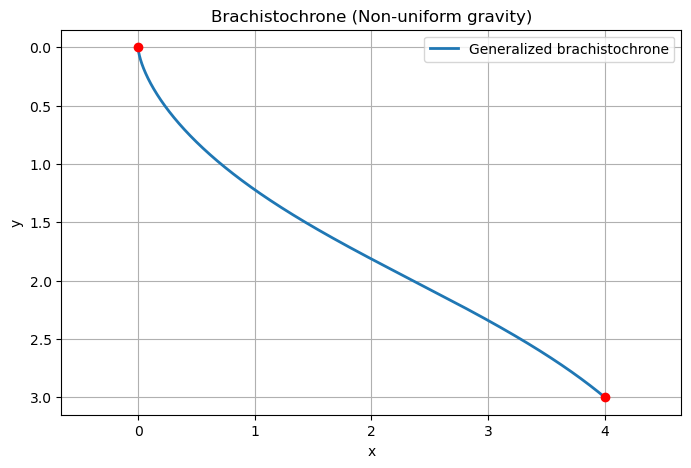


Non-uniform gravity case
C = 0.887916


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import brentq
import sys

# ---------- USER INPUT ----------
x_f = float(input("Enter final x-coordinate xf: "))
y_f = float(input("Enter final y-coordinate yf: "))
alpha = float(input("Enter alpha: "))
# --------------------------------

# ---------- CASE 1: UNIFORM GRAVITY ----------
if abs(alpha) < 1e-10:

    # Solve cycloid parameter theta_max
    def cycloid_eq(theta):
        R = y_f / (1 - np.cos(theta))
        return R * (theta - np.sin(theta)) - x_f

    theta_max = brentq(cycloid_eq, 1e-6, 2*np.pi - 1e-6)
    R = y_f / (1 - np.cos(theta_max))

    theta = np.linspace(0, theta_max, 600)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    plt.figure(figsize=(8,5))
    plt.plot(x, y, lw=2, label="Cycloid (α = 0)")
    plt.scatter([0, x_f], [0, y_f], color='red', zorder=5)
    plt.gca().invert_yaxis()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Brachistochrone (Uniform gravity)")
    plt.grid()
    plt.axis('equal')
    plt.legend()
    plt.show()

    print("\nUniform gravity case (α = 0)")
    print(f"R = {R:.6f}")
    print(f"theta_max = {theta_max:.6f}")

    sys.exit()

# ---------- CASE 2: NON-UNIFORM GRAVITY ----------
if alpha <= 0:
    print("Wrong: alpha must be ≥ 0")
    sys.exit()

if y_f >= 2 / alpha:
    print("Wrong: physical condition violated (yf must be < 2/alpha)")
    sys.exit()

y_min = 1e-6
N = 6000
y_grid = np.linspace(y_min, y_f, N)

def x_difference(C):
    denom = 1 / (C**2 * (y_grid - 0.5 * alpha * y_grid**2)) - 1
    if np.any(denom <= 0):
        return np.inf
    dx_dy = 1 / np.sqrt(denom)
    x = cumulative_trapezoid(dx_dy, y_grid, initial=0)
    return x[-1] - x_f

C_min = 1e-4
C_max = np.sqrt(2 / alpha) * 0.999

if x_difference(C_min) * x_difference(C_max) > 0:
    print("Wrong: no physical solution for given inputs")
    sys.exit()

C_solution = brentq(x_difference, C_min, C_max)

denom = 1 / (C_solution**2 * (y_grid - 0.5 * alpha * y_grid**2)) - 1
dx_dy = 1 / np.sqrt(denom)
x = cumulative_trapezoid(dx_dy, y_grid, initial=0)

plt.figure(figsize=(8,5))
plt.plot(x, y_grid, lw=2, label="Generalized brachistochrone")
plt.scatter([0, x_f], [0, y_f], color='red', zorder=5)
plt.gca().invert_yaxis()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Brachistochrone (Non-uniform gravity)")
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

print("\nNon-uniform gravity case")
print(f"C = {C_solution:.6f}")


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import interact, FloatSlider

def plot_brachistochrone(x_f, y_f):
    plt.figure(figsize=(8,5))
    
    def equation(theta_max):
        R = y_f / (1 - np.cos(theta_max))
        return R * (theta_max - np.sin(theta_max)) - x_f

    # Only allow physically valid curves
    if x_f / y_f > np.pi:
        plt.text(0.5, 0.5, "No solution!", ha='center', va='center', fontsize=16)
        plt.gca().invert_yaxis()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.axis('equal')
        plt.show()
        return
    
    theta_max = fsolve(equation, np.pi/2)[0]
    R = y_f / (1 - np.cos(theta_max))
    theta = np.linspace(0, theta_max, 500)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    # Plot
    plt.plot(x, y, lw=2, label='Brachistochrone')
    plt.scatter([0, x_f], [0, y_f], color='red', label='Endpoints')
    plt.gca().invert_yaxis()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Interactive Brachistochrone")
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

# Create sliders for x_f and y_f
interact(plot_brachistochrone,
         x_f=FloatSlider(value=5, min=1, max=15, step=0.1, description="x_f"),
         y_f=FloatSlider(value=5, min=1, max=10, step=0.1, description="y_f"));


interactive(children=(FloatSlider(value=5.0, description='x_f', max=15.0, min=1.0), FloatSlider(value=5.0, des…

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import brentq
from ipywidgets import interact, FloatSlider

def plot_generalized_brachistochrone(x_f, y_f, alpha):

    # ---------- PHYSICAL CHECKS ----------
    if alpha <= 0:
        print("α must be positive")
        return

    if y_f >= 2 / alpha:
        print("Physical violation: y_f must be < 2/α")
        return

    # ---------- NUMERICAL SETUP ----------
    y_min = 1e-6
    N = 4000
    y_grid = np.linspace(y_min, y_f, N)

    # Function whose root gives C
    def x_difference(C):
        denom = 1 / (C**2 * (y_grid - 0.5 * alpha * y_grid**2)) - 1
        if np.any(denom <= 0):
            return np.inf
        dx_dy = 1 / np.sqrt(denom)
        x = cumulative_trapezoid(dx_dy, y_grid, initial=0)
        return x[-1] - x_f

    # ---------- BRACKETING ----------
    C_min = 1e-4
    C_max = np.sqrt(2 / alpha) * 0.999

    if x_difference(C_min) * x_difference(C_max) > 0:
        print("No physical solution for this (x_f, y_f, α)")
        return

    # ---------- SOLVE ----------
    C_solution = brentq(x_difference, C_min, C_max)

    # ---------- FINAL CURVE ----------
    denom = 1 / (C_solution**2 * (y_grid - 0.5 * alpha * y_grid**2)) - 1
    dx_dy = 1 / np.sqrt(denom)
    x = cumulative_trapezoid(dx_dy, y_grid, initial=0)

    # ---------- PLOT ----------
    plt.figure(figsize=(8,5))
    plt.plot(x, y_grid, lw=2, label="Generalized brachistochrone")
    plt.scatter([0, x_f], [0, y_f], color='red', zorder=5, label="Endpoints")

    plt.gca().invert_yaxis()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Non-uniform gravity brachistochrone  (α = {alpha:.2f})")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

    print(f"C = {C_solution:.6f}")

# ---------- SLIDERS ----------
interact(
    plot_generalized_brachistochrone,
    x_f=FloatSlider(value=5, min=0.5, max=15, step=0.1, description="x_f"),
    y_f=FloatSlider(value=3, min=0.5, max=8, step=0.1, description="y_f"),
    alpha=FloatSlider(value=0.3, min=0.05, max=1.0, step=0.05, description="α")
);


interactive(children=(FloatSlider(value=5.0, description='x_f', max=15.0, min=0.5), FloatSlider(value=3.0, des…